# Elenco Vs Popularidade de um filme

Grupo (com o critério 'Trabalho em equipe'):
- Pedro Fontes (70
- Giovanni dos santos (20%)
- Victor Niubó (10%)

Nos surgiu uma duvida em umas das aulas de regressão: será que se pode medir a qualidade de um filme (popularidade) analisando seu elenco? Para responder essa pergunta, pegamos os dados dos 5000 mais relevantes do site Imdb (o site mais completo em relação a cinema) para ver a correlação entre os atores e a popularidade dos filmes.

In [1]:
import pandas as pd
import statsmodels.api as sm

a = 400

In [2]:
data1 = pd.read_csv('tmdb_5000_credits.csv')
data2 = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
data_credits = data1.set_index('title')
data_movie = data2.set_index('title')

Os dados era constituídos de dois dataframes:

- Um com o elenco e as pessoas da produção. Destes dados, só nos era relevante o elenco (Para um futuro trabalho, poderia ser analisado tambem a influência da produção mo filme).


- Outro era com as informações um pouco mais qualitativas como o orçamento e a receita de um filme. Desses dados, pegamos a popularidade do filme e sua nota média (vale resaltar que a nota média não foi usada para fins de regressão, somente para analise quanlitativa, por terem filmes com nota média muito alta, mas com número de votos baixíssimo



In [4]:
data_credits.head(3)

,movie_id,cast,crew
title,,,
Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
data_movie.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466


In [6]:
data = data_credits.join(data_movie, how="inner")

Antes da filtragem de dados para a continuação do trabalho, fizemos algumas plotagens para ver se chegaríamos à alguma conclusão intuitiva para comparação com a regressão

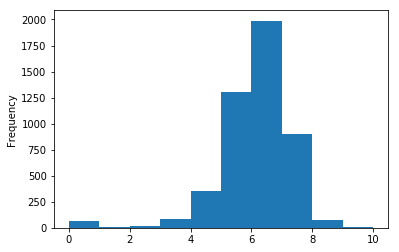

In [7]:
data.vote_average.plot.hist();

Nesse Histograma, podemos ver que a maioria dos filmes analisados tem nota acima de 6. como estamos querendo analisar filmes que fizeram sucesso e seus atores, esse dado indica que a maioria deles são acima da média

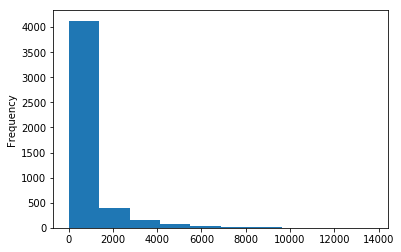

In [8]:
data.vote_count.plot.hist();

No contra ponto, temos o histograma de contagens de votos, que mostra claramente que existem filmes que nao tiveram votos ou muito poucos.

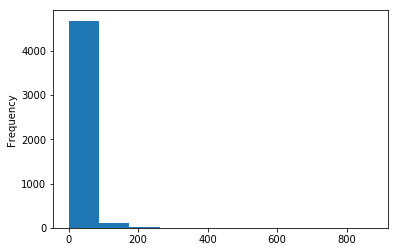

In [9]:
data.popularity.plot.hist();

Como estamos analisando os 5000 filmes do Imdb, é de se esperar que existam filmes nessa lista que ninguém nunca ouviu falar. não descartamos esses filmes justamente para termos um balanceamento nos atores.

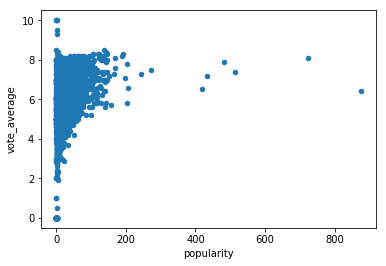

In [10]:
data.plot.scatter(x='popularity', y='vote_average');

interressante notar nesse scatter que a popularidade do filme esta pouco relacionada a sua popularidade. isso se da ao fato de vários filmes terem pouquíssimos votos por serem desconhecidos

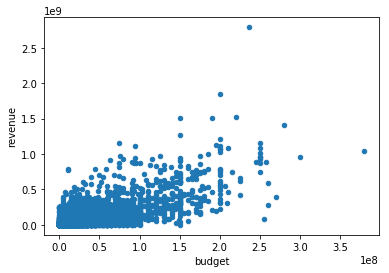

In [11]:
data.plot.scatter(x='budget', y='revenue');

Esse scatter nos mostra que existe, mesmo sendo pequena, uma correlação entre quanto um filme custa pra ser produzido e o quanto de receita ele gera. Pode-se dever ao fato de que as pessoas gostam mais de filmes 'mais bem feitos'

Nesta parte do projeto, junstamos os dois dataframes importados do site e o desmembramos para obter somente as informações relevantes para nossa analise (popularidade, elenco, e, para fins qualitatios, a média da nota).

In [12]:
data.head(3)

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
#Horror,301325,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de...",1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,#Horror,...,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,3.3,52
(500) Days of Summer,19913,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de...",7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,(500) Days of Summer,...,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,7.2,2904
10 Cloverfield Lane,333371,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de...",15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,10 Cloverfield Lane,...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,6.8,2468


In [13]:
df = data[['cast', 'popularity', 'vote_average']]
df.sort_values(by="popularity", ascending=False).head(5)

,cast,popularity,vote_average
title,,,
Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...",875.581305,6.4
Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...",724.247784,8.1
Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...",514.569956,7.4
Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...",481.098624,7.9
Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...",434.278564,7.2


No nosso dataframe dae analise, nota-se que o elenco esta como um dicionario com algumas informações irrelevantes (como nome do personagem e ID de elenco). Para melhor análise separamos o elenco em outro dataframe para conseguirmos extrair quais atores fizeram quais filmes.

Foi adicionado a esse Dataframe uma coluna indicando de qual filme aquele ator/personagem pertence.

In [14]:
cast_total = []

for l in df.iterrows():
    lista_dic = eval(l[1]["cast"])
    for dic in lista_dic:
        dic["movie"] = l[0]
    cast_total.extend(lista_dic)


In [15]:
d = pd.DataFrame.from_records(cast_total)
dados = d[['character', 'movie', 'name']]

In [16]:
dados.head(6)

,character,movie,name
0,Alex's 12-Step Friend,#Horror,Taryn Manning
1,Sam's Mom,#Horror,Natasha Lyonne
2,Alex Cox,#Horror,Chloë Sevigny
3,Mr. Cox,#Horror,Balthazar Getty
4,Dr. White,#Horror,Timothy Hutton
5,Lisa,#Horror,Lydia Hearst


In [17]:
x = dados.name.value_counts()
x.head(15)

Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
Steve Buscemi        43
Liam Neeson          41
Owen Wilson          40
Johnny Depp          40
Nicolas Cage         39
John Goodman         39
Alec Baldwin         39
Willem Dafoe         38
Brad Pitt            38
Jim Broadbent        38
Name: name, dtype: int64

Para fins de visualização e contextualização, fizemos um value_counts para saber se, no futuro, algum ator será dispensado na regressão devido ao seu possível valor P

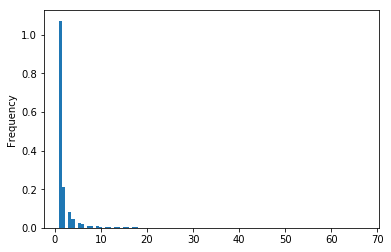

In [18]:
x.plot.hist(density=True, bins=100)

Podemos ver neste histograma que o numero de filmes por ator é bem desproporcional. 

Com essa tabela de atores feita, foi possivel inserir no dataframe principal uma coluna por ator. Devido ao número desproporcional de filmes por ator, achamos relevante pegar somente os atores com 18 filmes feitos ou mais para que tivessemos certeza de que o ator teve alguma relevância no filme. cada coluna de ator foi substitutida com 0s e 1s dependendo de que filme ele participou ou não.

In [19]:
atores = list(dados.name.value_counts().head(a).index)

In [31]:
for i in atores:
    df[i] = 0
    
df

for i in dados.itertuples():
    if i.name in df.columns:
        
        df.loc[i.movie, i.name] = 1

df

,cast,popularity,vote_average,Samuel L. Jackson,Robert De Niro,Bruce Willis,Matt Damon,Morgan Freeman,Steve Buscemi,Liam Neeson,...,Demi Moore,Eddie Marsan,Joe Chrest,Siobhan Fallon,Zeljko Ivanek,Katie Holmes,Will Patton,Joaquin Phoenix,Bob Gunton,John Hawkes
title,,,,,,,,,,,,,,,,,,,,,
#Horror,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...",2.815228,3.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
(500) Days of Summer,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...",45.610993,7.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...",53.698683,6.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Days in a Madhouse,"[{""cast_id"": 2, ""character"": ""Nellie Bly"", ""cr...",0.489271,4.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,"[{""cast_id"": 2, ""character"": ""Patrick Verona"",...",54.550275,7.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,"[{""cast_id"": 1, ""character"": ""Cruella de Vil"",...",9.895061,5.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th & Wolf,"[{""cast_id"": 1, ""character"": ""Tommy"", ""credit_...",3.942464,6.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11:14,"[{""cast_id"": 10, ""character"": ""Jack"", ""credit_...",15.048067,6.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,"[{""cast_id"": 29, ""character"": ""Juror 8"", ""cred...",59.259204,8.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tudo pronto para a regressão linear!

Nessa etapa separamos a entrada (dataframe de atores com seus 0s e 1s) e a saída (popularidade do filme)

In [35]:
colunas = list(df.columns)
indesejaveis = ['cast', 'popularity', 'vote_average']

for i in indesejaveis:
    colunas.remove(i)

entrada = df.loc[:, colunas]

out = df['popularity']

A regressão foi feita usando a funsão OLS do statsmodel

In [36]:
def regress(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [37]:
var = regress(entrada, out)

In [38]:
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     11.01
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:42:36   Log-Likelihood:                -22700.
No. Observations:                4809   AIC:                         4.620e+04
Df Residuals:                    4409   BIC:                         4.879e+04
Df Model:                         400                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Samuel L. Jackson          1.1162      3.834      0.291      0.771      -6.401       8.633
Robert De Niro            10.5056      4.069      2.582      0.010       2.529      18.482
Bruce Willis              17.7726      4.312      4.121      0.000       9.318      26.227
Matt Damon                22.2682      4.586      4.856      0.000      13.278      31.258
Morgan Freeman            20.9395      4.649      4.504      0.000      11.826      30.053
Steve Buscemi              3.2741      4.930      0.664      0.507      -6.392      12.940
Liam Neeson               19.6511      4.805      4.090      0.000      10.231      29.071
Owen Wilson               -1.1228      5.268     -0.213      0.831     -11.452       9.206
Johnny Depp               19.7906      4.973      3.980      0.000      10.041      29.540
Nicolas Cage               7.4088      4.879      1.519      0.129      -2.156      16.973
John Goodman               9.7950      4.905      1.997      0.046       0.179      19.412
Alec Baldwin               4.3562      4.880      0.893      0.372      -5.211      13.923
Willem Dafoe               0.6411      5.098      0.126      0.900      -9.353      10.635
Brad Pitt                 22.3824      5.084      4.403      0.000      12.416      32.349
Jim Broadbent              0.6156      5.062      0.122      0.903      -9.308      10.539
Stanley Tucci              9.5229      5.144      1.851      0.064      -0.562      19.608
Paul Giamatti              8.2751      5.027      1.646      0.100      -1.580      18.130
Will Ferrell              -7.8840      5.389     -1.463      0.144     -18.450       2.682
Richard Jenkins           -2.7709      5.150     -0.538      0.591     -12.868       7.326
Susan Sarandon             1.0195      5.059      0.202      0.840      -8.899      10.938
Bill Murray               11.3127      5.206      2.173      0.030       1.107      21.518
Keith David                3.7801      5.124      0.738      0.461      -6.265      13.826
J.K. Simmons               8.3639      5.290      1.581      0.114      -2.006      18.734
Christopher Walken         2.9016      5.182      0.560      0.576      -7.258      13.061
Paul Rudd                 -9.9758      5.585     -1.786      0.074     -20.926       0.974
Michael Shannon            2.6866      5.203      0.516      0.606      -7.513      12.887
Anthony Hopkins           -5.5215      5.231     -1.055      0.291     -15.777       4.734
Robin Williams             8.8485      5.220      1.695      0.090      -1.386      19.083
George Clooney             1.2107      5.503      0.220      0.826      -9.579      12.000
Jack Black                 7.8825      5.426      1.453      0.146      -2.756      18.521
Justin Long               -5.6789      5.443     -1.043      0.297     -16.349  

Interessante notar que estavamos certos! Os atores que fizeram muitos filmes tem valor P alto devido ao fato de que a chance de este ator ter feito tanto filmes bons quanto ruins é grande.

Localizando as variáveis que tem seu valor P muito alto, podemos filtra-las para um melhor funcionamento do modelo



In [39]:
pv_altos = list(var.pvalues.sort_values(ascending=False)[0:300].index)

In [40]:
colunas = list(df.columns)
indesejaveis = ['cast', 'popularity', 'vote_average']

for i in pv_altos:
    indesejaveis.append(i)
    
for i in indesejaveis:
    colunas.remove(i)

entrada = df.loc[:, colunas]

out = df['popularity']

var = regress(entrada, out)

In [41]:
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     38.53
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:45:00   Log-Likelihood:                -22927.
No. Observations:                4809   AIC:                         4.605e+04
Df Residuals:                    4709   BIC:                         4.670e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Robert De Niro           12.7286      3.914      3.252      0.001       5.055      20.402
Bruce Willis             20.7302      4.099      5.057      0.000      12.694      28.767
Matt Damon               26.5523      4.316      6.152      0.000      18.090      35.014
Morgan Freeman           25.0327      4.367      5.733      0.000      16.472      33.593
Liam Neeson              21.1220      4.628      4.564      0.000      12.048      30.196
Johnny Depp              28.8513      4.666      6.183      0.000      19.703      37.999
John Goodman             14.2964      4.700      3.041      0.002       5.081      23.511
Brad Pitt                23.2043      4.800      4.834      0.000      13.794      32.615
Bill Murray              13.7269      4.950      2.773      0.006       4.023      23.431
Ben Kingsley             14.4342      4.999      2.887      0.004       4.633      24.235
David Koechner           -5.6717      5.104     -1.111      0.266     -15.677       4.334
Bill Hader               16.3695      5.279      3.101      0.002       6.020      26.719
Sigourney Weaver         23.9835      5.085      4.717      0.000      14.015      33.952
Tom Cruise               25.2925      5.190      4.873      0.000      15.118      35.467
Frank Welker             19.8376      5.373      3.692      0.000       9.304      30.371
Laurence Fishburne       18.0616      5.099      3.542      0.000       8.065      28.058
Arnold Schwarzenegger    29.7775      5.211      5.714      0.000      19.562      39.993
Harrison Ford            19.0039      5.289      3.593      0.000       8.636      29.372
Sylvester Stallone       13.9272      5.195      2.681      0.007       3.742      24.112
John Hurt                25.7686      5.198      4.957      0.000      15.578      35.960
Tom Hanks                30.2716      5.203      5.818      0.000      20.070      40.473
Cameron Diaz             24.6447      5.255      4.690      0.000      14.342      34.947
Woody Harrelson          17.1617      5.329      3.221      0.001       6.715      27.608
John Travolta            15.4843      5.332      2.904      0.004       5.030      25.938
Robert Duvall            14.7756      5.335      2.770      0.006       4.317      25.235
Matthew McConaughey      22.4634      5.456      4.117      0.000      11.767      33.160
Michael Caine            33.4539      5.531      6.048      0.000      22.610      44.297
Jason Statham            24.3326      5.524      4.405      0.000      13.502      35.163
Kristen Wiig             12.4863      5.842      2.137      0.033       1.033      23.939
Allison Janney           28.3743      5.472      5.185      0.000      17.646      39.102
Gary Oldman              24.7293      5.606      4.412      0.000      13.740      35.719
Scarlett Johansson     

Finalmente, podemos ver que, mesmo com o $r^2$ mais baixos, os valores P estao satisfatoriamente pequenos